<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></span></li></ul></div>

# Image Captioning - Advanced Statistics Topics

In this notebook, we train several models and save the results of its metrics.

## Import Libraries

In this section we import the requiere libraries and establish the connection with Google Drive.

In [34]:
# Se importan las librerias necesarias
import numpy as np
import pandas as  pd
import os
import gzip
import timeit
import json
import collections
import random
import time
from PIL import Image
# from google.colab import drive # Necesario para GoogleColab

# Tensorflow 2.x
import tensorflow as tf # Not required for this notebook 
print('TENSORFLOW VERSION: {}'.format(tf.__version__))

TENSORFLOW VERSION: 2.4.1


In [2]:
# Se fija el directorio referencia con el se conecta colab a drive # Necesario para GoogleColab
# drive.mount('/content/drive')

In [3]:
# Se guarda en una variable el directorio del curso

# Directorio de los datos
# data_folder = 'drive/MyDrive/Colab Notebooks/AST-ImageCaptioning/Data/'
data_folder = '../Data/'

## Functions and Classes

In [42]:
# Load an image and adjust it to InceptionV3 networks
def image_to_v3_format(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

## Data Preprocessing

In this section we process the images and its respective captions.

In [4]:
# Download caption annotation files
annotation_folder = data_folder + '/Captions/'
if not os.path.exists(os.path.abspath('.') + '/' + annotation_folder):
    annotation_zip = tf.keras.utils.get_file('captions.zip',
                              cache_subdir=os.path.abspath('.') + '/' + data_folder,
                              origin='http://images.cocodataset.org/annotations/annotations_trainval2014.zip',
                              extract=True)
    os.rename(data_folder + 'annotations/', annotation_folder)
    annotation_file = os.path.dirname(annotation_zip) + '/annotations/captions_train2014.json'
    os.remove(annotation_zip)

252878848/252872794 [==============================] - 6s 0us/step


In [25]:
# Download image files
image_folder = data_folder + 'Images/'
if not os.path.exists(os.path.abspath('.') + '/' + image_folder):
    image_zip = tf.keras.utils.get_file('Train.zip',
                                      cache_subdir=os.path.abspath('.') + '/' + image_folder,
                                      origin='http://images.cocodataset.org/zips/train2014.zip',
                                      extract=True)
    os.rename(image_folder + 'train2014/', image_folder + 'Train/')
    PATH = image_folder + 'Train/'
    os.remove(image_zip)
else:
    PATH = image_folder + 'Train/'

## Loading Images and Captions

In [27]:
# Process all the captions
with open(annotation_folder + 'captions_train2014.json', 'r') as f:
    captions = json.load(f)
    
# Group all captions together having the same image ID.
image_path_to_caption = collections.defaultdict(list)
for val in captions['annotations']:
    caption = f"<start> {val['caption']} <end>"
    image_path = PATH + 'COCO_train2014_' + '%012d.jpg' % (val['image_id'])
    image_path_to_caption[image_path].append(caption)

In [31]:
image_paths = list(image_path_to_caption.keys())
random.shuffle(image_paths)

# Select the first 6000 image_paths from the shuffled set.
# Approximately each image id has 5 captions associated with it, so that will
# lead to 30,000 examples.
train_image_paths = image_paths.copy()#[:6000]
print('THE NUMBER OF IMAGES IS {} AND THERE IS {} CAPTIONS'.format(len(train_image_paths), len(captions['annotations'])))

THE NUMBER OF IMAGES IS 82783 AND THERE IS 414113 CAPTIONS


In [33]:
train_captions = []
img_name_vector = []

for image_path in train_image_paths:
    caption_list = image_path_to_caption[image_path]
    train_captions.extend(caption_list)
    img_name_vector.extend([image_path] * len(caption_list))

Caption: <start> A woman sitting on a surfboard in the middle of the ocean. <end>


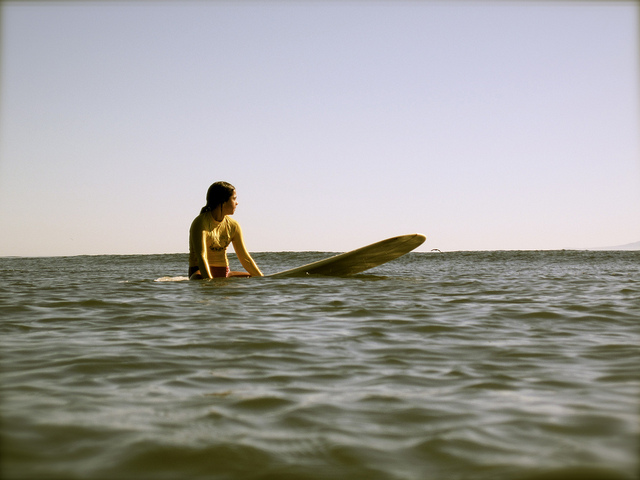

In [41]:
sample_image = 1608
print('Caption:', train_captions[sample_image])
Image.open(img_name_vector[sample_image])

# End